In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import psycopg2
import pandas as pd

In [4]:
DBNAME = "opportunity_youth"

In [5]:
conn = psycopg2.connect(dbname=DBNAME)

In [6]:
oy_by_puma = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, n.puma_name
               FROM pums_2017 p
               JOIN puma_names_2010 n
               ON p.puma = n.puma
               WHERE p.puma BETWEEN '11610' AND '11615'
               AND p.esr = '3'
               AND p.sch = '1'
               AND p.agep BETWEEN '16' AND '24'
               GROUP BY n.puma_name
               
               ;""", conn)
oy_by_puma

,oy_count,puma_name
0,435.0,"King County (Central)--Renton City, Fairwood, ..."
1,762.0,"King County (Far Southwest)--Federal Way, Des ..."
2,414.0,"King County (Southeast)--Maple Valley, Covingt..."
3,505.0,King County (Southwest Central)--Kent City ...
4,569.0,King County (Southwest)--Auburn City & Lakelan...
5,538.0,"King County (West Central)--Burien, SeaTac, Tu..."


In [7]:
oy_by_puma['oy_count'].sum()

3223.0

hoping to add a few more unemployed youths to our data set by examining wkl=2 or 3, wkw=5 or 6, esr=6

In [8]:
pd.read_sql("""SELECT SUM(pwgtp) AS oy_count
               FROM pums_2017 p
               WHERE p.puma BETWEEN '11610' AND '11615'
               AND p.esr = '6'
               AND p.sch = '1'
               AND p.agep BETWEEN '16' AND '24'
               
               ;""", conn)

,oy_count
0,7391.0


In [9]:
oy_count_with_esr3_cow_wkl = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, n.puma_name, p.puma
                                            FROM pums_2017 p
                                            JOIN puma_names_2010 n
                                            ON p.puma = n.puma
                                            WHERE p.puma BETWEEN '11610' AND '11615'
                                            AND (p.esr = '3' OR p.wkl = '2' OR p.wkl = '3' OR p.cow = '8')
                                            AND p.sch = '1'
                                            AND p.agep BETWEEN '16' AND '24'
                                            GROUP BY n.puma_name, p.puma
                                            ;""", conn)
oy_count_with_esr3_cow_wkl

,oy_count,puma_name,puma
0,1333.0,"King County (Central)--Renton City, Fairwood, ...",11610
1,1803.0,"King County (Far Southwest)--Federal Way, Des ...",11612
2,1009.0,"King County (Southeast)--Maple Valley, Covingt...",11615
3,1524.0,King County (Southwest Central)--Kent City ...,11613
4,1226.0,King County (Southwest)--Auburn City & Lakelan...,11614
5,1753.0,"King County (West Central)--Burien, SeaTac, Tu...",11611


In [10]:
oy_count_with_esr3_cow_wkl['oy_count'].sum()

8648.0

In [11]:
oy_count_with_esr_wkl_south = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, n.puma_name, p.puma
                                           FROM pums_2017 p
                                           JOIN puma_names_2010 n
                                           ON p.puma = n.puma
                                           WHERE p.puma BETWEEN '11610' AND '11615'
                                           AND (p.esr = '3' OR p.esr = '6'
                                                OR p.wkl = '2' OR p.wkl = '3')
                                           AND p.sch = '1'
                                           AND p.agep BETWEEN '16' AND '24'
                                           GROUP BY n.puma_name, p.puma
                                           ORDER BY oy_count DESC
                                           ;""", conn)
oy_count_with_esr_wkl_south

,oy_count,puma_name,puma
0,2038.0,"King County (West Central)--Burien, SeaTac, Tu...",11611
1,2006.0,King County (Southwest Central)--Kent City ...,11613
2,1977.0,"King County (Far Southwest)--Federal Way, Des ...",11612
3,1853.0,"King County (Central)--Renton City, Fairwood, ...",11610
4,1530.0,King County (Southwest)--Auburn City & Lakelan...,11614
5,1210.0,"King County (Southeast)--Maple Valley, Covingt...",11615


In [12]:
oy_count_with_esr_wkl_south['oy_count'].sum()

10614.0

getting curious about the oy count for entire king county

puma codes relevant 11601 through 11616

In [13]:
oy_count_with_esr_wkl_king = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, n.puma_name, p.puma
                                           FROM pums_2017 p
                                           JOIN puma_names_2010 n
                                           ON p.puma = n.puma
                                           WHERE p.puma BETWEEN '11601' AND '11616'
                                           AND (p.esr = '3' OR p.esr = '6'
                                                OR p.wkl = '2' OR p.wkl = '3')
                                           AND p.sch = '1'
                                           AND p.agep BETWEEN '16' AND '24'
                                           GROUP BY n.puma_name, p.puma
                                           ORDER BY oy_count DESC
                                           ;""", conn)
oy_count_with_esr_wkl_king

,oy_count,puma_name,puma
0,2038.0,"King County (West Central)--Burien, SeaTac, Tu...",11611
1,2006.0,King County (Southwest Central)--Kent City ...,11613
2,1977.0,"King County (Far Southwest)--Federal Way, Des ...",11612
3,1853.0,"King County (Central)--Renton City, Fairwood, ...",11610
4,1530.0,King County (Southwest)--Auburn City & Lakelan...,11614
5,1325.0,Seattle City (Northeast) ...,11602
6,1210.0,"King County (Southeast)--Maple Valley, Covingt...",11615
7,1086.0,King County (Northwest Central)--Greater Belle...,11608
8,1032.0,Seattle City (Downtown)--Queen Anne & Magnolia...,11603
9,953.0,"King County (Northeast)--Snoqualmie City, Cott...",11616


In [14]:
oy_count_with_esr_wkl_king['oy_count'].sum()

19984.0

Let's try visualizations now!
first plot

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
oy_count_with_esr_wkl_south

,oy_count,puma_name,puma
0,2038.0,"King County (West Central)--Burien, SeaTac, Tu...",11611
1,2006.0,King County (Southwest Central)--Kent City ...,11613
2,1977.0,"King County (Far Southwest)--Federal Way, Des ...",11612
3,1853.0,"King County (Central)--Renton City, Fairwood, ...",11610
4,1530.0,King County (Southwest)--Auburn City & Lakelan...,11614
5,1210.0,"King County (Southeast)--Maple Valley, Covingt...",11615


In [17]:
x = oy_count_with_esr_wkl_south['puma']
y = oy_count_with_esr_wkl_south['oy_count']
names = oy_count_with_esr_wkl_south['puma_name']
names

0    King County (West Central)--Burien, SeaTac, Tu...
1    King County (Southwest Central)--Kent City    ...
2    King County (Far Southwest)--Federal Way, Des ...
3    King County (Central)--Renton City, Fairwood, ...
4    King County (Southwest)--Auburn City & Lakelan...
5    King County (Southeast)--Maple Valley, Covingt...
Name: puma_name, dtype: object

In [18]:
names = [x.split('--')[1] for x in names]
names

['Burien, SeaTac, Tukwila Cities & White Center                                                                                                                                                                                                                                                                                                                                                                                                                                           ',
 'Kent City                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ',
 'Federal Way, Des Moines Cities & Vashon Island   

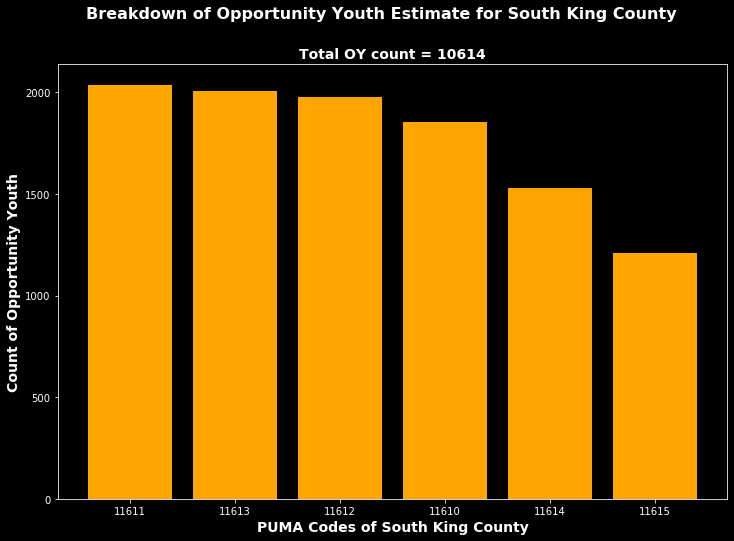

In [19]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(1, figsize=(12,8))
fig.suptitle("Breakdown of Opportunity Youth Estimate for South King County", fontsize=16, fontweight='bold')
ax.bar(x, y, color='orange')
ax.set_xlabel('PUMA Codes of South King County', fontsize= 14, fontweight='bold')
ax.set_ylabel("Count of Opportunity Youth", fontsize= 14, fontweight='bold')
ax.set_yticks(range(0, 2001, 500))
ax.set_title("Total OY count = 10614", fontsize=14, fontweight='bold')
plt.savefig('oy_south.png');

In [20]:
a = oy_count_with_esr_wkl_king['puma']
b = oy_count_with_esr_wkl_king['oy_count']

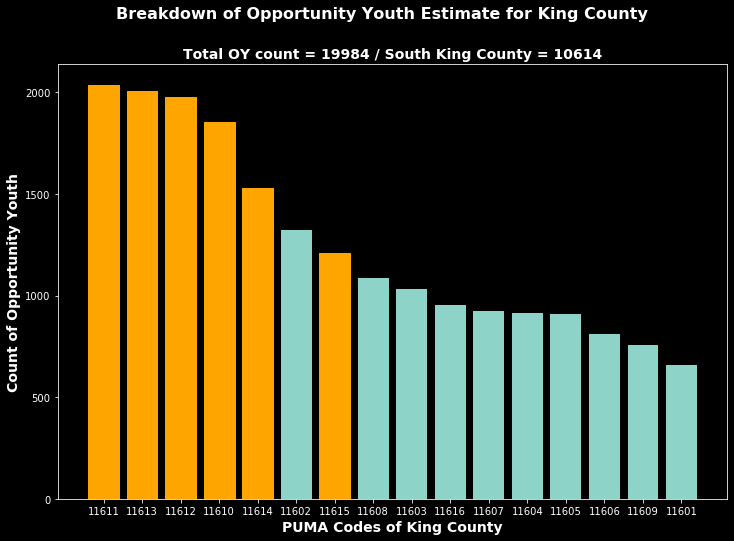

In [21]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(1, figsize=(12,8))
fig.suptitle("Breakdown of Opportunity Youth Estimate for King County", fontsize=16, fontweight='bold')
rect = ax.bar(a, b)
ax.set_xlabel('PUMA Codes of King County', fontsize= 14, fontweight='bold')
ax.set_ylabel("Count of Opportunity Youth", fontsize= 14, fontweight='bold')
ax.set_yticks(range(0, 2001, 500))
ax.set_title("Total OY count = 19984 / South King County = 10614", fontsize=14, fontweight='bold')

for x in range(5):
    rect[x].set_color('orange')
rect[6].set_color('orange')
plt.savefig('oy_king.png');

In [22]:
x = oy_count_with_esr_wkl_south['puma']
y = oy_count_with_esr_wkl_south['oy_count']

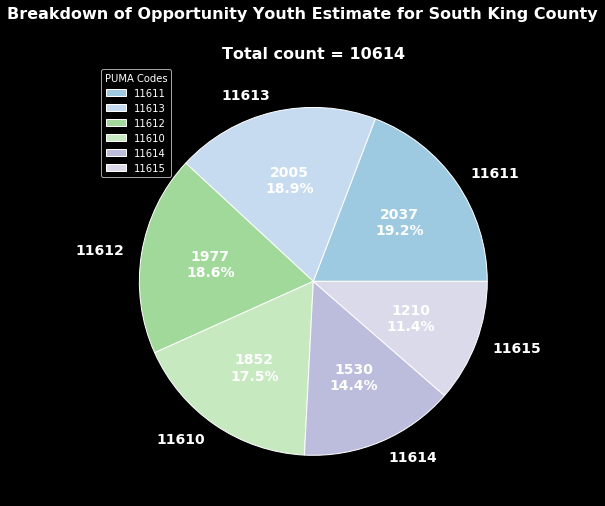

In [23]:
import numpy as np
counts = [int(y[i]) for i in range(len(y))]
plt.style.use(['dark_background'])
fig, ax = plt.subplots(1, figsize=(12,8))
cmap = plt.get_cmap("tab20c")
color = cmap(np.array([2,3,10,11,14,15]))
def value_count(count, counts):
    absolute = int(count/100.*np.sum(counts))
    return "{}\n{:.1f}%".format(absolute, count)
fig.suptitle("Breakdown of Opportunity Youth Estimate for South King County",
             fontsize=16, fontweight='bold')
wedges, texts, autotexts = ax.pie(y, radius=1, labels=x, colors=color, autopct=lambda count: value_count(count, counts), 
       textprops=dict(size=14, weight='bold'), wedgeprops=dict(edgecolor='w'))
ax.set_title("Total count = 10614", fontsize=16, fontweight='bold')
ax.legend(wedges, x, title='PUMA Codes', loc='upper left')
plt.savefig('SouthKingPie_v2.png');